Full Formula (Li1 Tb1 Se2)
Reduced Formula: LiTbSe2
abc   :   6.923143   6.923143   6.923143
angles:  34.340415  34.340415  34.340415
Sites (4)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li    0.5       0.5       0.5              0
  1  Se    0.248733  0.248733  0.248733         0
  2  Se    0.751267  0.751267  0.751267         0
  3  Tb    0         0         0                0
 
Les 3 premiers pics sont définis dans le tableau suivant: 2*theta, intensité, hkl 
13.59412591781855 29.716785969381853 [{'hkl': (1, 1, 1), 'multiplicity': 2}]
25.55310037407732 22.35621653019237 [{'hkl': (1, 0, 0), 'multiplicity': 6}]
26.766713372253697 0.002695829231603769 [{'hkl': (1, 1, 0), 'multiplicity': 6}]



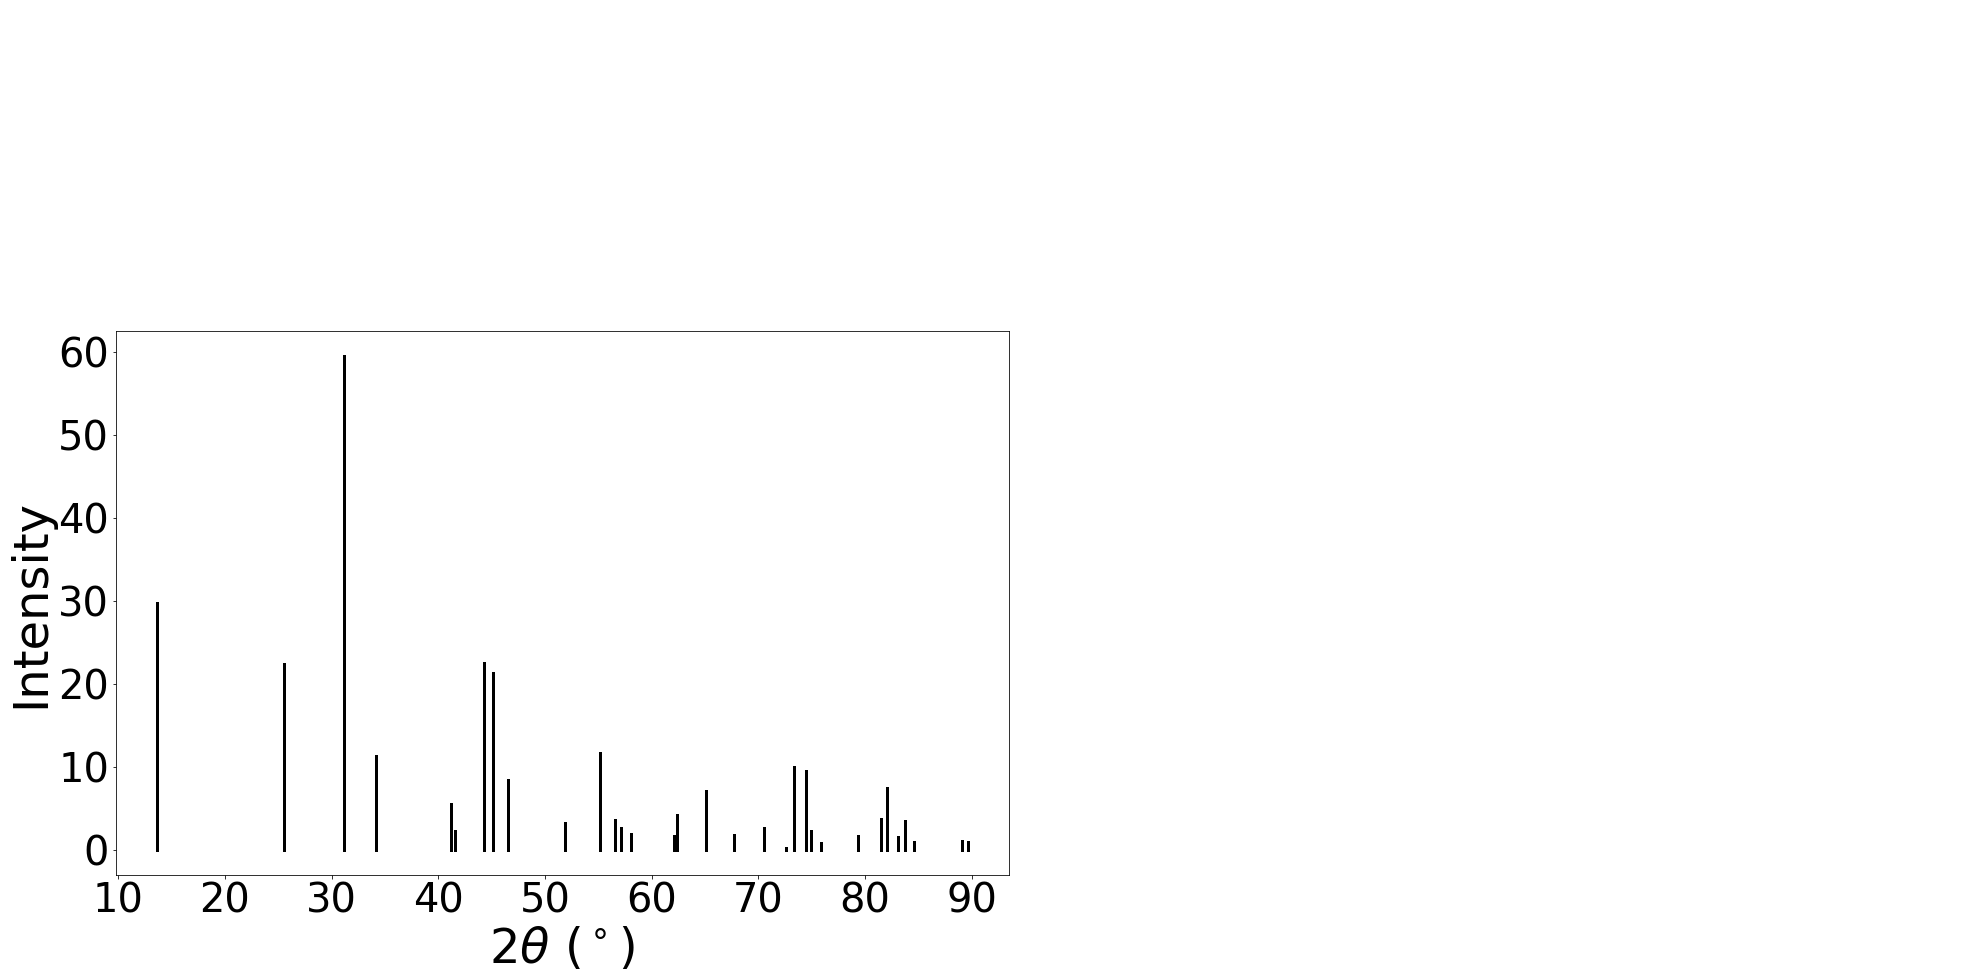

In [50]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import IStructure
from pymatgen.util.typing import Vector3Like
from pymatgen import Molecule 
from pymatgen import Structure

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
#from pymatgen.symmetry.groups.PointGroup import 
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
from pymatgen.core.spectrum import Spectrum


import numpy.matlib as np
import math
import pymatgen as mp
import pymatgen.symmetry.analyzer as span
import pymatgen.symmetry.groups as symm
import pymatgen.analysis.diffraction.xrd as diff



with MPRester("r7QKrVN0WzAjMGwDF") as m:
    structure = m.get_structure_by_material_id("mp-15793")
print(structure)
print(" ")
# coordonnées réduites
#mol = Molecule(['Li','Tb','Se','Se'], [[0.5,0.5,0.5], [0,0,0], [0.2487,0.2487,0.2487], [0.7513,0.7513,0.7513]])
#print(mol)
#coords = mol.cart_coords
#print(type(coords))
#print(coords)
#coord = np.array([[0.5,0.5,0.5], [0,0,0], [0.2487,0.2487,0.2487], [0.7513,0.7513,0.7513]])
#print(coord)
# indices de Miller associés
#ind = Lattice.get_miller_index_from_coords(coords)

# Calcul les pics de diffractions 
finder = span.SpacegroupAnalyzer(structure)
new_finder=finder.get_primitive_standard_structure()

diffp=XRDCalculator(1.54060,0,None)
xrd=diffp.get_pattern(new_finder,True,None)
print("Les 3 premiers pics sont définis dans le tableau suivant: 2*theta, intensité, hkl ")
print(xrd.x[0],xrd.y[0],xrd.hkls[0])
print(xrd.x[1],xrd.y[1],xrd.hkls[1])
print(xrd.x[2],xrd.y[2],xrd.hkls[2])
print("")

two_theta_range=(0,90)
from pymatgen.util.plotting import pretty_plot
plt = pretty_plot(16, 10)
ax = plt.gca()
for two_theta, i, hkls, d_hkl in zip(xrd.x, xrd.y, xrd.hkls, xrd.d_hkls):
    if two_theta_range[0] <= two_theta <= two_theta_range[1]:
        label = ", ".join([str(hkl["hkl"]) for hkl in hkls])
        ax.plot([two_theta, two_theta], [0, i], color='k',linewidth=3, label=label)
        
ax.annotate(label, xy=[two_theta, i],xytext=[two_theta, i], fontsize=16)
ax.set_xlabel(r"$2\theta$ ($^\circ$)")
ax.set_ylabel("Intensity")
plt.show()

# Fait avec l'aide de Nicolas Bioul

#print(diffraction) affiche la location de l'objet 
#figure = diffraction.get_pattern(structure, scaled=False, two_theta_range=(0, 90)) # True or False?
#print(figure) # à mettre en graphique

#graph = diffraction.get_plot(structure, two_theta_range=(0, 90), annotate_peaks=True, ax=None, with_labels=True, fontsize=16)




